In [150]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [82]:
# Importing dataset
data = pd.read_csv("marketing_campaign.csv", sep= "\t")
data.head()

##-------- CLEANING & MANIPULATING THE DATA -------##


# Dropping unrequired columns 
data = data.drop(columns = ["ID","Recency", "NumWebVisitsMonth", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", 
          "AcceptedCmp1", "AcceptedCmp2", "Z_CostContact", "Z_Revenue",
          "Response"])



In [83]:
# Adding extra features for total number of kids, has kids, total spent 
# age when a customer

data["Num_children"] = data["Kidhome"] + data["Teenhome"]

data["Has_children"] = data.apply(lambda x : 1 if x["Num_children"] > 0 else 0, axis=1 )

data["Total_spend"] = data["MntFishProducts"] + data["MntFruits"] + \
data["MntGoldProds"] + data["MntMeatProducts"] + data["MntSweetProducts"] + \
data["MntWines"]

data["Dt_Customer"] = data["Dt_Customer"].astype("datetime64[ns]") # Converting to datetime 
data["Age_customer"] = data["Dt_Customer"].dt.year - data["Year_Birth"]

data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,Num_children,Has_children,Total_spend,Age_customer
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,635,88,546,...,88,3,8,10,4,0,0,0,1617,55
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,11,1,6,...,6,2,1,1,2,0,2,1,27,60
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,426,49,127,...,42,1,8,2,10,0,0,0,776,48
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,11,4,20,...,5,2,2,0,4,0,1,1,53,30
4,1981,PhD,Married,58293.0,1,0,2014-01-19,173,43,118,...,15,5,5,3,6,0,1,1,422,33


In [84]:
# Summary statistics
data.describe()

# Find/remove missing values
data.isna().sum()
data = data.dropna()
data.isna().sum()

# Find remove duplicates
data.duplicated().sum()


Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
Complain               0
Num_children           0
Has_children           0
Total_spend            0
Age_customer           0
dtype: int64

C:\Users\windh\AppData\Local\Temp\ipykernel_332\3315174845.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(["No","Yes"])
C:\Users\windh\AppData\Local\Temp\ipykernel_332\3315174845.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[3].set_xticklabels(["No","Yes"])


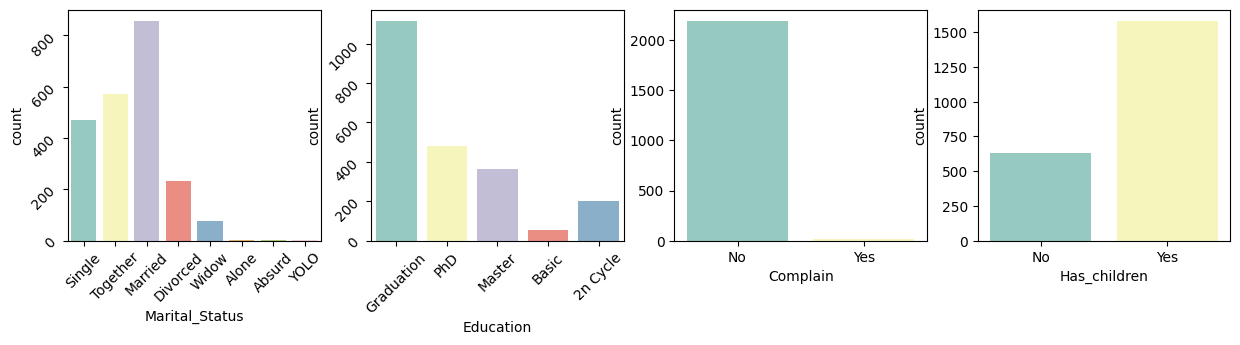

In [172]:
# Plotting categorical data

sns.set_palette("Set3")
fig, ax = plt.subplots(1,4, figsize=(15,3))
sns.countplot(data=data, x='Marital_Status', hue='Marital_Status', ax=ax[0])
sns.countplot(data=data, x='Education', hue='Education', ax=ax[1])
sns.countplot(data=data, x='Complain', hue='Complain', ax=ax[2], legend=False)
sns.countplot(data=data, x='Has_children', hue='Has_children', ax=ax[3], legend=False)
ax[0].tick_params(rotation=45)
ax[1].tick_params(rotation=45)
ax[2].set_xticklabels(["No","Yes"])
ax[3].set_xticklabels(["No","Yes"])
plt.show()

<Axes: xlabel='Total_spend', ylabel='Count'>

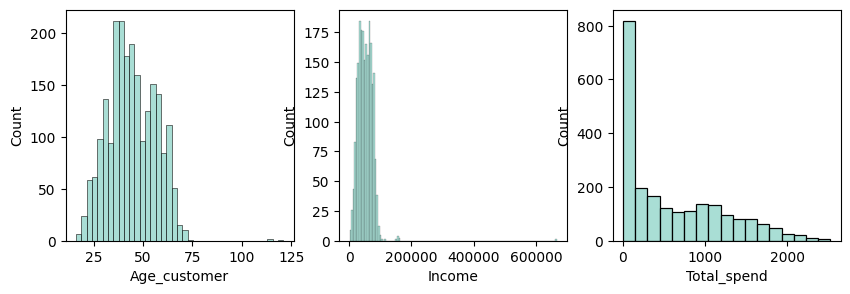

In [119]:
fig, ax = plt.subplots(1,3, figsize=(10, 3))
sns.histplot(data=data, x="Age_customer", ax=ax[0])
sns.histplot(data=data, x="Income", ax=ax[1])
sns.histplot(data=data, x="Total_spend", ax=ax[2])

# Outliers, in age > 100 & income > 200,000 REMOVE OUTLIERS 


In [170]:
# Making a new dataset with outliers removed
test = data[data["Age_customer"]<100]
test = test[test["Income"]<150000]


0

<Axes: xlabel='Total_spend', ylabel='Count'>

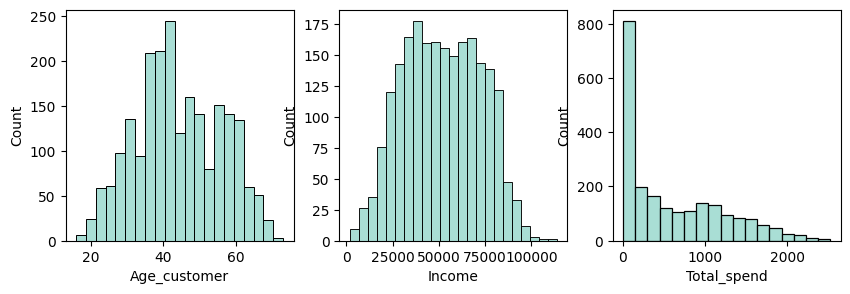

In [171]:
# Testing that all outliers removed 
(test["Age_customer"]>100).sum() + (test["Income"]>150000).sum()

fig, ax = plt.subplots(1,3, figsize=(10, 3))
sns.histplot(data=test, x="Age_customer", ax=ax[0])
sns.histplot(data=test, x="Income", ax=ax[1])
sns.histplot(data=test, x="Total_spend", ax=ax[2])

<Axes: xlabel='Income', ylabel='Total_spend'>

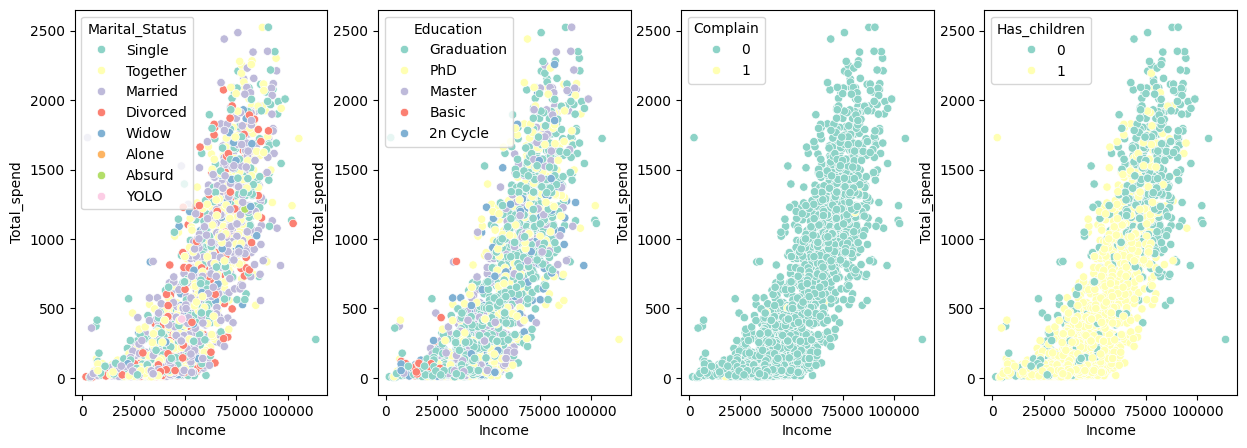

In [174]:
# Seeing relationship between income & total spend based on marital status, education, whether they complain and has children 
fig, ax = plt.subplots(1,4, figsize=(15,5))
sns.scatterplot(data=test, x = "Income", y = "Total_spend", hue = "Marital_Status", ax=ax[0])
sns.scatterplot(data=test, x = "Income", y = "Total_spend", hue = "Education", ax=ax[1])
sns.scatterplot(data=test, x = "Income", y = "Total_spend", hue = "Complain", ax=ax[2])
sns.scatterplot(data=test, x = "Income", y = "Total_spend", hue = "Has_children", ax=ax[3])

<Axes: xlabel='Age_customer', ylabel='Total_spend'>

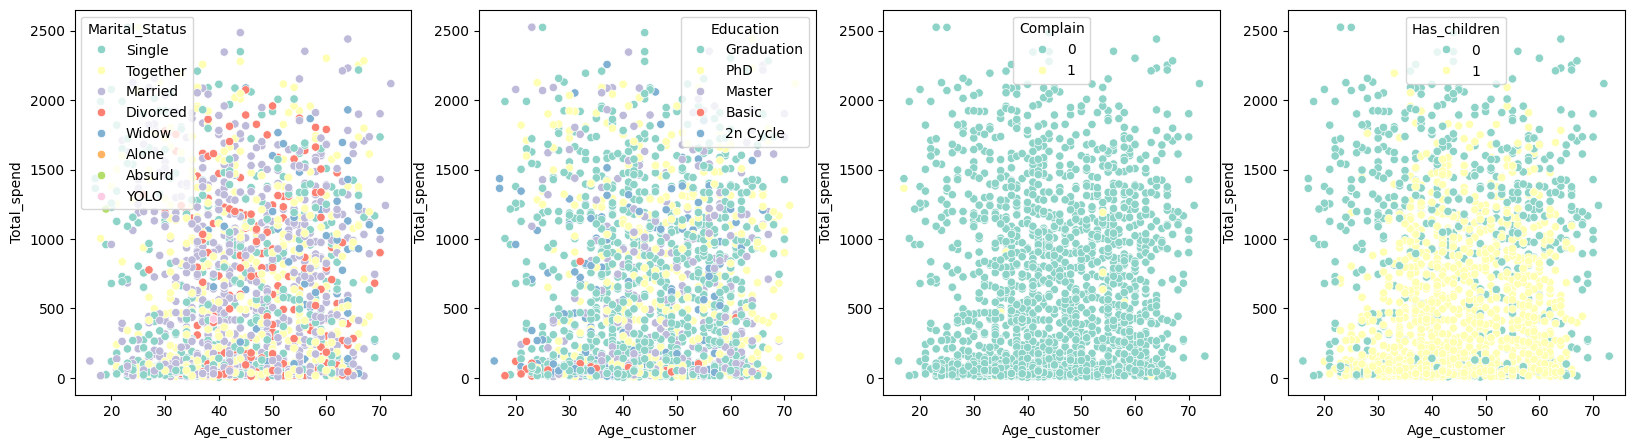

In [179]:
# Seeing relationship between age & total spend based on marital status, education, whether they complain and has children 
fig, ax = plt.subplots(1,4, figsize=(20,5))
sns.scatterplot(data=test, x = "Age_customer", y = "Total_spend", hue = "Marital_Status", ax=ax[0])
sns.scatterplot(data=test, x = "Age_customer", y = "Total_spend", hue = "Education", ax=ax[1])
sns.scatterplot(data=test, x = "Age_customer", y = "Total_spend", hue = "Complain", ax=ax[2])
sns.scatterplot(data=test, x = "Age_customer", y = "Total_spend", hue = "Has_children", ax=ax[3])

<Axes: xlabel='Age_customer', ylabel='Income'>

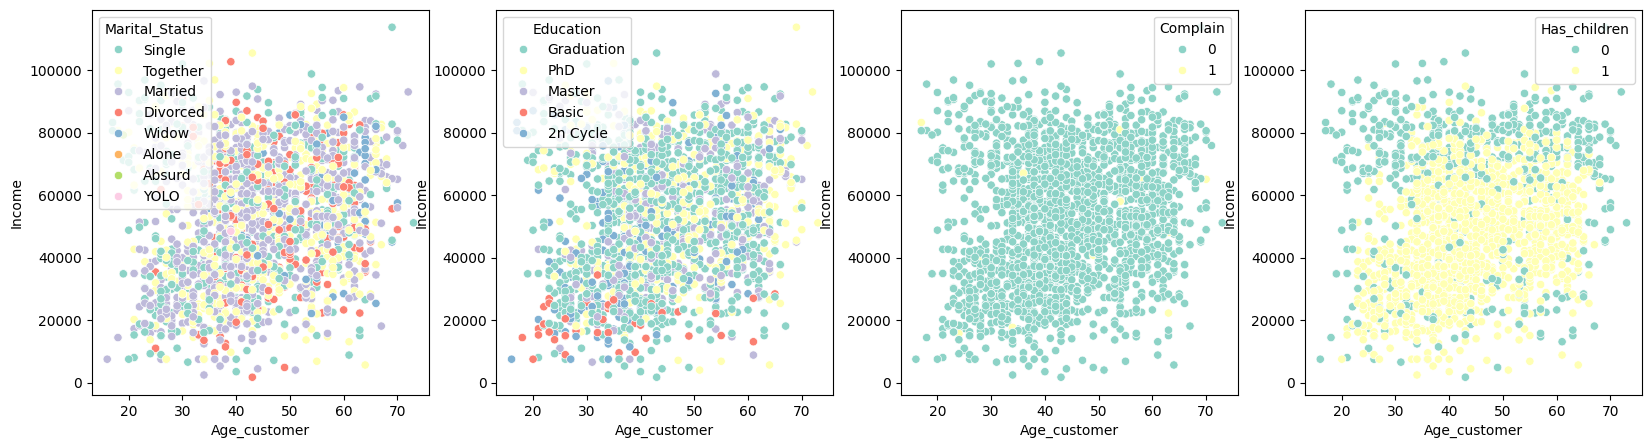

In [180]:
# Seeing relationship between age & income based on marital status, education, whether they complain and has children 
fig, ax = plt.subplots(1,4, figsize=(20,5))
sns.scatterplot(data=test, x = "Age_customer", y = "Income", hue = "Marital_Status", ax=ax[0])
sns.scatterplot(data=test, x = "Age_customer", y = "Income", hue = "Education", ax=ax[1])
sns.scatterplot(data=test, x = "Age_customer", y = "Income", hue = "Complain", ax=ax[2])
sns.scatterplot(data=test, x = "Age_customer", y = "Income", hue = "Has_children", ax=ax[3])